# Curve Fitting using scipy

One of the most important common tasks a physicist (and even chemists) has to do is to fit experimental  
data to a theoretical model. In this notebook, I'll demonstrate how to fit data to a theoretical model,  
and show a second example that illustrates one of the common pitfalls in curve fitting (not converging  
to an acceptable fit) and how to remedy the situation.

Because I don't want to deal with the reading in of a datafile in this notebook (just so we can focus  
on the curve fitting), I will generate some fake data by adding random noise to an analytic function.  
This function is actually our model function for fitting our data. When you go to fit data from an actual  
experiment, you'll need to create your own custom function, and the scipy curve_fit routine will use this  
function to fit your data. 

So, here are the needed libraries and our fitting function (which we'll also use to generate fake data):

In [26]:
import numpy as np
import matplotlib.pyplot as mpl
from scipy.optimize import curve_fit

def fitFunc(t, a, b, c):
    return a*np.exp(-b*t) + c


Now we create 
(1) a numpy array (t) with 50 linearly spaced points between 0 and 4,  
(2) a numpy array (temp) with 50 temperatures using a = 5.0, b = 1.5, and c = 0.5  
(3) a numpy array (noisy) with gaussian noise added to the array temp
and then,   
we use the scipy routine curve_fit to find the best fit parameters in the function fitFunc;  
the curve_fit routine returns and array of fit coefficients and a matrix of fit covariances  
(the diagonals of which are the squares of the 1 sigma uncertainties on the fit coefficients):

 fit coefficients:
[ 14.82155113  11.51993015   0.50354178]
 Covariance matrix:
[[ 0.02796583  0.01541631 -0.00052555]
 [ 0.01541631  0.08070828  0.00154677]
 [-0.00052555  0.00154677  0.00062009]]


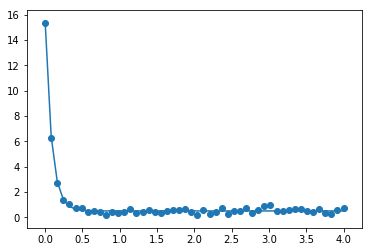

In [58]:
t = np.linspace(0,4,50)
temp = fitFunc(t, 5.0, 1.5, 0.5)
noisy = temp + 0.25*np.random.normal(size=len(temp))
fitParams1, fitCovariances1= curve_fit(fitFunc, t, temp)


fitParams, fitCovariances = curve_fit(fitFunc, t, noisy)
print ' fit coefficients:\n', fitParams
print ' Covariance matrix:\n', fitCovariances


mpl.plot(t, temp)
mpl.scatter(t,noisy)

#mpl.plot(x,func(x,*popt),'--')
mpl.show()

Here's a plot of the (fake) data and the best fit:

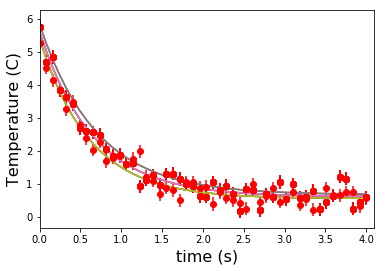

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import sqrt

#rcParams['figure.figsize'] = 10, 6 
plt.ylabel('Temperature (C)', fontsize = 16)
plt.xlabel('time (s)', fontsize = 16)
plt.xlim(0,4.1)
# plot the data as red circles with vertical errorbars
plt.errorbar(t, noisy, fmt = 'ro', yerr = 0.2)
# now plot the best fit curve and also +- 1 sigma curves
# (the square root of the diagonal covariance matrix  
# element is the uncertianty on the fit parameter.)
sigma = [sqrt(fitCovariances[0,0]), \
         sqrt(fitCovariances[1,1]), \
         sqrt(fitCovariances[2,2]) ]
plt.plot(t, fitFunc(t, fitParams[0], fitParams[1], fitParams[2]),\
         t, fitFunc(t, fitParams[0] + sigma[0], fitParams[1] - sigma[1], fitParams[2] + sigma[2]),\
         t, fitFunc(t, fitParams[0] - sigma[0], fitParams[1] + sigma[1], fitParams[2] - sigma[2])\
         )
# save plot to a file
#savefig('dataFitted.pdf', bbox_inches=0, dpi=600)
plt.show()

# Another Example with initial guesses for fit parameters

The curve_fit routine uses values of 1.0 for intial guesses for the fit parameters.  
That worked ok on the previous problem, but sometimes, one is faced with a situation  
where the fit will not converge, and in this case, you (as the intelligent user)  
must provide an intelligent guess for a starting point. 

Here I define some data equally spaced in time, and an array of termperatures  
that we hope to fit to an exponential reminiscent of a charging capacitor.  
I take this array of temperatures, and add some random noise and also define  
error bars on the termperature values: 

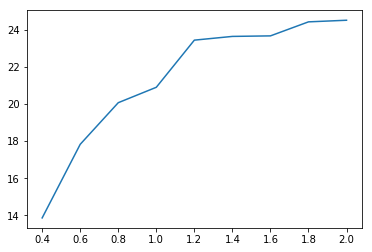

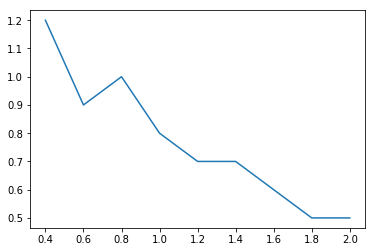

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import sqrt

def cap(x, a, b):
    return a*(1-np.exp(b*x))
t = np.linspace(0.4,2.0, 9)
temps = np.array([13.76, 17.47, 19.95, 21.62, 22.73, 23.48, 23.98, 24.32, 24.54])
temps = temps + 0.4*np.random.normal(size=len(temps))
dTemps = np.array([1.2, 0.9, 1.0, 0.8, 0.7, 0.7, 0.6, 0.5, 0.5])

mpl.plot(t, temps)
mpl.show()
mpl.plot(t,dTemps)

#mpl.plot(x,func(x,*popt),'--')
mpl.show()

In [62]:
# if you run this code, it won't work. Look at the error message that results:
fitParams, fitCovariances = curve_fit(cap, t, temps)
print fitParams
print fitCovariances

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

Now I add some initial guesses for  a  and  b; notice the fit now works fine (Think of p0 as an array of Parameter values at t=0):

In [63]:
fitParams, fitCovariances = curve_fit(cap, t, temps, p0 = [25.0, -1.0])
print ' fit coefficients:\n', fitParams
print ' Covariance matrix:\n', fitCovariances

 fit coefficients:
[ 24.94202355  -2.03627751]
 Covariance matrix:
[[ 0.08319425  0.01999523]
 [ 0.01999523  0.00703229]]


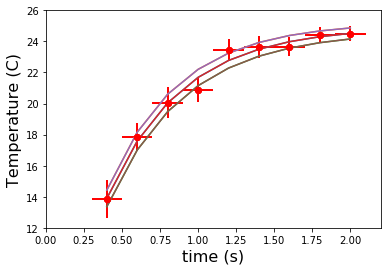

In [67]:
plt.ylabel('Temperature (C)', fontsize = 16)
plt.xlabel('time (s)', fontsize = 16)
plt.xlim(0,2.2)
plt.ylim(12, 26)
plt.errorbar(t, temps, yerr = dTemps, xerr = 0.1, fmt='ro')
plt.plot(t, cap(t, fitParams[0], fitParams[1]),
     t, cap(t, fitParams[0] + sqrt(fitCovariances[0,0]), fitParams[1] - sqrt(fitCovariances[1,1])),
     t, cap(t, fitParams[0] - sqrt(fitCovariances[0,0]), fitParams[1] + sqrt(fitCovariances[1,1]))
     )
plt.show()